# Inconel Powder (fits) 

In [1]:
debug = False

In [3]:
from PIL import Image
import numpy as np

In [4]:
from pprint import pprint
from ipywidgets import widgets
from ipywidgets.widgets import interact
from IPython.display import display

In [5]:
import matplotlib.image as mpimg

In [6]:
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

In [7]:
import glob

In [8]:
%matplotlib notebook

In [11]:
import pyfits

# Select working data set

In [36]:
# root folder
root_dir = '/Volumes/My Book Thunderbolt Duo/IPTS/BraggEdge/VULCAN/Inconel_Powder/'

In [37]:
# data folder
data_dir = root_dir + 'data'

In [38]:
# all *.fits images 
list_fname = glob.glob(data_dir + '/*')

In [39]:
#pprint(list_fname)

Make sure files are sorted the right way !

In [40]:
if debug:
    pprint(list_fname)
    print()
pprint("Loaded %d files" %(len(list_fname)))

'Loaded 1490 files'


Load images

In [41]:
nbr_data = len(list_fname)
images = []

w = widgets.IntProgress()
w.max = nbr_data
display(w)

for _index in range(nbr_data):
        
        _file = list_fname[_index]
        hdu_list = pyfits.open(_file)  # fits
        hdu = hdu_list[0]
        _image = hdu.data
        #_image = Image.open(_file)  # tif
        
        _image = np.asarray(_image)
        images.append(_image)

        w.value = _index
    

In [28]:
#test images are correctly loaded

<IPython.core.display.Javascript object>


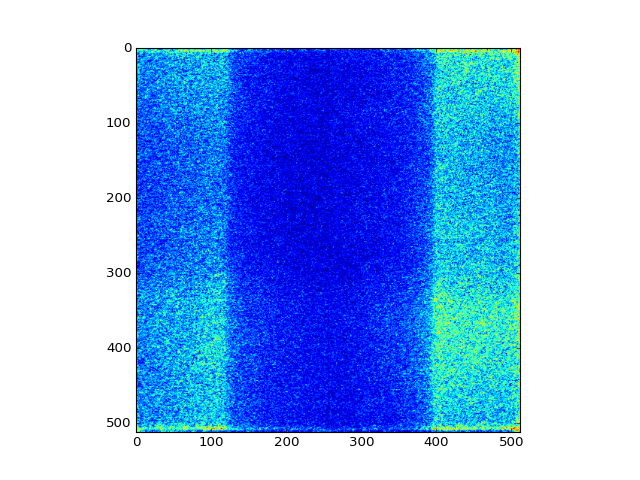

In [29]:
plt.figure()
plt.imshow(images[200])

## Select Range of Data of Interest

In [30]:
%matplotlib inline

[59, 1214]

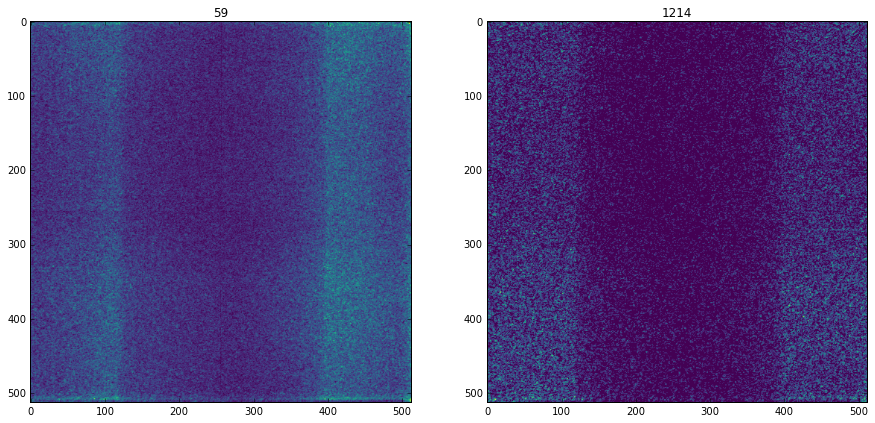

In [42]:
[height, width] = images[0].shape
nbr_images = len(images)
    
# select Sample region
def plot_images_to_keep(file_index_start, file_index_end):
    """displays the first image excluded and kept, and the last image kept and excluded"""
    
    _data1_out = images[file_index_start - 1]
    _data1_in = images[file_index_start]
    
    _data2_in = images[file_index_end]
    _data2_out = images[file_index_end + 1]

    fig3 = plt.figure(figsize=(15, 50))

    ax_img1_in = plt.subplot(121)
    ax_img1_in.imshow(_data1_in, cmap='viridis')
    ax_img1_in.set_title("%d" %(file_index_start))
    #ax_img1_in.set_title(list_fname[file_index_start - 1])

    ax_img2_in = plt.subplot(122)
    ax_img2_in.imshow(_data2_in, cmap='viridis')
    ax_img2_in.set_title("%d" %(file_index_end))
    #ax_img2_out.set_title("Last image excluded: %s" %list_fname[file_index_end])

    return [file_index_start, file_index_end]
    
file_range = interact(plot_images_to_keep,
               file_index_start = widgets.IntSlider(min=0, max=nbr_images, step=1, value=59, description='First Image to Keep'),
               file_index_end = widgets.IntSlider(min=0, max=nbr_images, step=1, value=1214, description='First Image to Keep'))


In [43]:
[file_index_start, file_index_end] = file_range.widget.result

In [44]:
images = images[file_index_start: file_index_end]

# Normalize images (OB are in their own files)

Using average number of counts from OB ROI / images and divide each pixel of images by normalized coefficient

In [45]:
# Default folder
ob_dir = root_dir + 'OB'

In [46]:
# all *.fits images 
list_ob_name = glob.glob(ob_dir + '/*')
list_ob_name = list_ob_name[file_index_start: file_index_end]

In [47]:
nbr_ob = len(list_ob_name)
ob = []

w = widgets.IntProgress()
w.max = nbr_ob
display(w)

for _index in range(nbr_ob):
        
        _file = list_ob_name[_index]
        hdu_list = pyfits.open(_file)  # fits
        hdu = hdu_list[0]
        _image = hdu.data
        
        _image = np.asarray(_image)
        ob.append(_image)

        w.value = _index

In [48]:
nbr_data = len(images)
nbr_ob = len(ob)

In [49]:
#report
print("Nbr data files: %d" %nbr_data)
print("Nbr OB files: %d" %nbr_ob)

Nbr data files: 1155
Nbr OB files: 1155


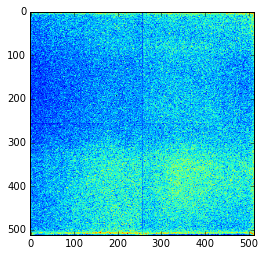

In [50]:
plt.figure()
plt.imshow(ob[200])

### Divide each image by its open beam

In [51]:
normalized = []
w = widgets.IntProgress()
w.max = nbr_ob
display(w)

for _index in range(nbr_ob):
        
    _data = images[_index]
    _ob = ob[_index]
    _ob[_ob == 0] = np.NaN
    
    _ratio = _data / _ob
    normalized.append(_ratio)
    
    w.value = _index

1155


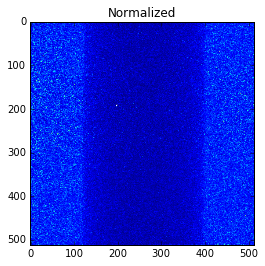

In [52]:
plt.figure()
plt.title("Normalized")
plt.imshow(normalized[200])
print(len(normalized))

## Select Region of Interest 

[131, 383, 13, 500]

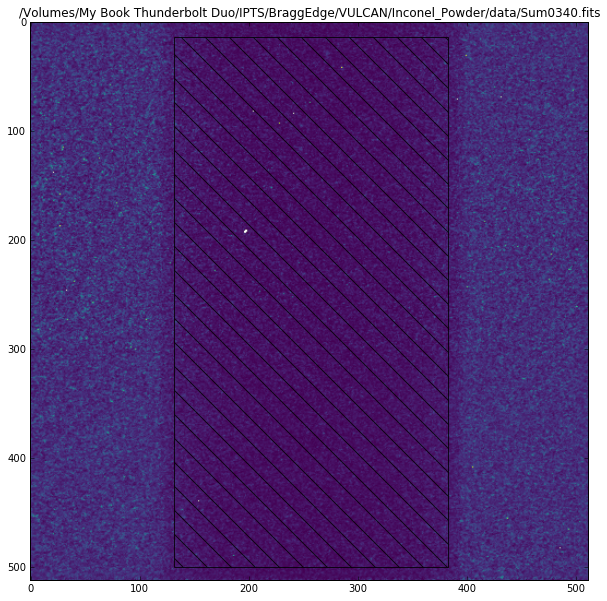

In [53]:
[height, width] = normalized[0].shape
    
# select Sample region
def plot_images_to_select_sample_regions(file_index, 
                                        s_left, s_right, s_top, s_bottom):

    _data = normalized[file_index]

    fig1 = plt.figure(figsize=(10, 10))
    ax_img = plt.subplot(111)

    ax_img.imshow(_data, cmap='viridis')
    ax_img.set_title(list_fname[file_index])

    ax_img.add_patch(Rectangle((s_left, s_bottom), (s_right - s_left), (s_top - s_bottom), 
                              fill = False,
                               hatch = '\\',
                              alpha = 0.8,
                              facecolor = 'red'))

    return [s_left, s_right, s_top, s_bottom]


crop = interact(plot_images_to_select_sample_regions,
            file_index = widgets.IntSlider(min=0, max=nbr_images, step=1, value=600, description='Image Index'),
            s_left = widgets.IntSlider(min=0, max=width, step=1, value=131, description='left sample'),
            s_right = widgets.IntSlider(min=0, max=width, step=1, value=383, description='right sample'),
            s_top = widgets.IntSlider(min=0, max=height, step=1, value=13, description='top sample'),
            s_bottom = widgets.IntSlider(min=0, max=height, step=1, value=500, description='bottom sample')) 


In [54]:
# crop data

In [55]:
s_selection = crop.widget.result
print("Region selected:")
print()
print("-> Sample: ")
print("      left: %d" %s_selection[0])
print("     right: %d" %s_selection[1])
print("       top: %d" %s_selection[2])
print("    bottom: %d" %s_selection[3])

Region selected:

-> Sample: 
      left: 131
     right: 383
       top: 13
    bottom: 500


In [56]:
[s_left, s_right, s_top, s_bottom] = s_selection

cropped_normalized = []
for _image in normalized:
    _image_cropped = _image[s_top: s_bottom, s_left: s_right]
    cropped_normalized.append(_image_cropped)

1155


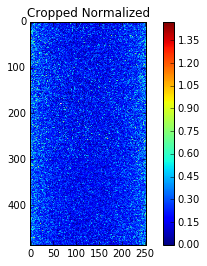

In [57]:
plt.figure()
plt.title("Cropped Normalized")
my_plot = plt.imshow(cropped_normalized[200])
print(len(cropped_normalized))
plt.colorbar(my_plot)

## Display Counts vs file index 

### 1. for each pixels

### 2. for binning of pixels defined 

In [58]:
# how to bin the pixels
pixel_binning = 10 

Create 2D array of indices that will allow to quickly find the position of a pixel into the rebin array

    [0,0] [0,0] [0,1] [0,1] [0,2] ...
    [0,0] [0,0] [0,1] [0,1] [0,2] ...
    [1,0] [1,0] [1,1] [1,1] [1,2] ..
     ...

In [59]:
[height, width] = cropped_normalized[0].shape

In [60]:
print("width: %d" %width)
x_axis_bin = np.arange(0, width, pixel_binning)
print(x_axis_bin)

print("height: %d" %height)
y_axis_bin = np.arange(0, height, pixel_binning)
print(y_axis_bin)

width: 252
[  0  10  20  30  40  50  60  70  80  90 100 110 120 130 140 150 160 170
 180 190 200 210 220 230 240 250]
height: 487
[  0  10  20  30  40  50  60  70  80  90 100 110 120 130 140 150 160 170
 180 190 200 210 220 230 240 250 260 270 280 290 300 310 320 330 340 350
 360 370 380 390 400 410 420 430 440 450 460 470 480]


Remove range of pixels that don't have a full bin

In [61]:
bin_cropped_normalized = []
for _image in cropped_normalized:
    _tmp_image = _image[0: y_axis_bin[-1], 0: x_axis_bin[-1]]
    bin_cropped_normalized.append(_tmp_image)

In [62]:
[bin_height, bin_width] = bin_cropped_normalized[0].shape

Bin all images

In [63]:
w = widgets.IntProgress()
w.max = len(bin_cropped_normalized)
display(w)

_bin_images = np.empty(len(bin_cropped_normalized), dtype=object)

_index = 0
for _image in bin_cropped_normalized:

    _bin_image = np.zeros((len(y_axis_bin)-1, len(x_axis_bin)-1))
    for _x_index in range(len(x_axis_bin)-1):
        for _y_index in range(len(y_axis_bin)-1):
            _sub_array = _image[y_axis_bin[_y_index]:y_axis_bin[_y_index + 1], 
                                x_axis_bin[_x_index]:x_axis_bin[_x_index + 1]]
            
            _sub_array_mean = np.mean(_sub_array)
            _bin_image[_y_index, _x_index] = _sub_array_mean
            
    _bin_images[_index] = _bin_image
    _index += 1

    w.value = _index


In [ ]:
#To check that there is a difference between the images

<IPython.core.display.Javascript object>


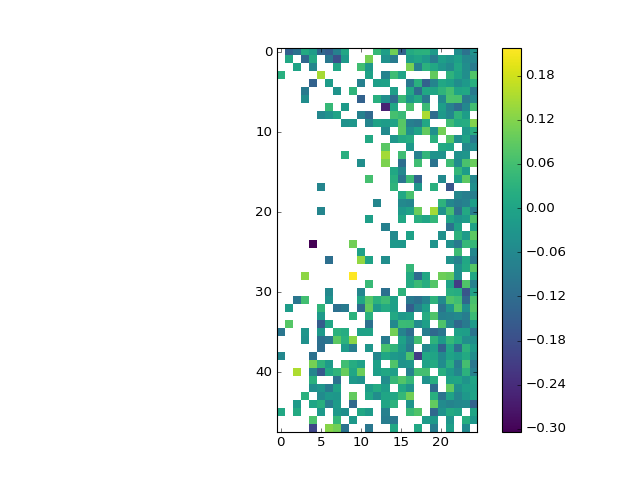

(48, 25)


/Users/j35/anaconda/lib/python3.4/site-packages/ipykernel/__main__.py:3: RuntimeWarning: invalid value encountered in subtract
  app.launch_new_instance()


In [105]:
fig9 = plt.figure()
ax_img = plt.subplot()
cax = ax_img.imshow(_bin_images[5] - _bin_images[0], interpolation='nearest', cmap='viridis')
print(_bin_images[5].shape)
fig9.colorbar(cax)

#### check images binned

<IPython.core.display.Javascript object>


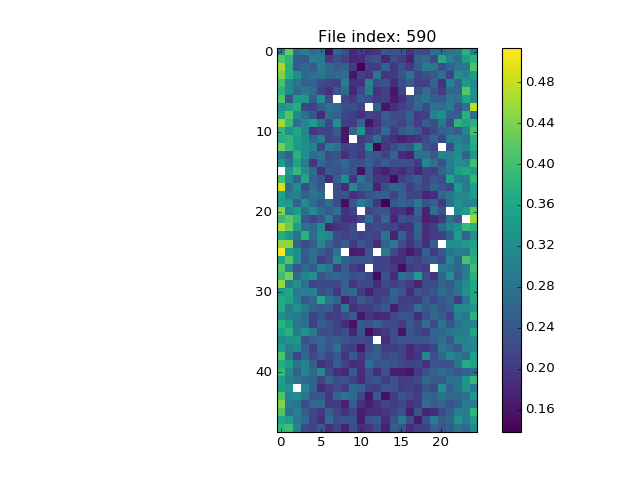

In [106]:
# select Sample region
nbr_images = len(_bin_images)

def plot_images_binned(file_index):
    
    _image = _bin_images[file_index]

    fig8 = plt.figure()

    ax_img1 = plt.subplot(111)
    cax = ax_img1.imshow(_image, cmap='viridis', interpolation='nearest')
    ax_img1.set_title("File index: %d" %file_index)
    cmap = fig8.colorbar(cax)
    
check_normalization = interact(plot_images_binned,
                   file_index = widgets.IntSlider(min=0, max=nbr_images, step=1, value=0, 
                                              description='Image Index'))

<IPython.core.display.Javascript object>


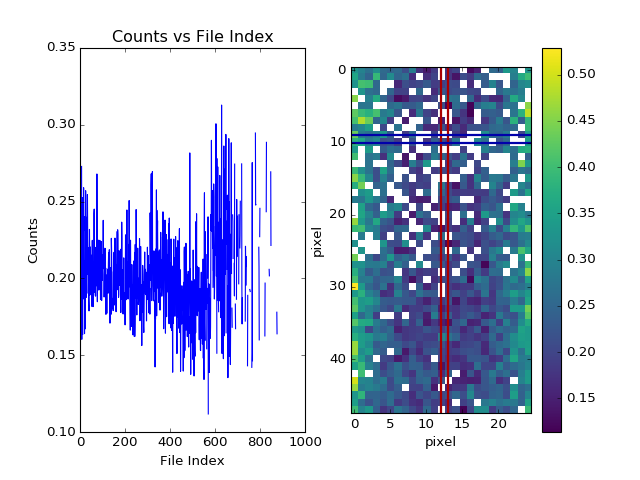

In [107]:
def plot_counts_binned(y_bin, x_bin):
    """Display the x_bin and y_bin counts over all the files"""
    
    _counts_bin = []
    for _image in _bin_images:
        _counts_bin.append(_image[y_bin, x_bin])
    
    fig5 = plt.figure()

    ax_img1 = plt.subplot(121)
    ax_img1.plot(_counts_bin)
    ax_img1.set_title("Counts vs File Index")
    ax_img1.set_xlabel("File Index")
    ax_img1.set_ylabel("Counts")
    
    ax_img2 = plt.subplot(122)
    cax = ax_img2.imshow(_bin_images[int(len(_bin_images)/2)], cmap='viridis', interpolation="nearest")
    ax_img2.axvline(x_bin, color='#aa0000', linewidth=2)
    ax_img2.axvline(x_bin+1, color='#aa0000', linewidth=2)
    ax_img2.axhline(y_bin, color='#0000aa', linewidth=2)
    ax_img2.axhline(y_bin+1, color='#0000aa', linewidth=2)
    ax_img2.set_xlabel("pixel")
    ax_img2.set_ylabel("pixel")
    fig5.colorbar(cax)
    
counts_binned = interact(plot_counts_binned,
                       y_bin = widgets.IntSlider(min=0, max=len(y_axis_bin), step=1, value=0, description='Y bin index'),
                        x_bin = widgets.IntSlider(min=0, max=len(x_axis_bin), step=1, value=0, description='X bin index'))


### 3. for entire image

In [146]:
nbr_images = len(cropped_normalized)

total_counts = []
for _image in cropped_normalized:
    _sum = np.nansum(_image)
    total_counts.append(_sum)

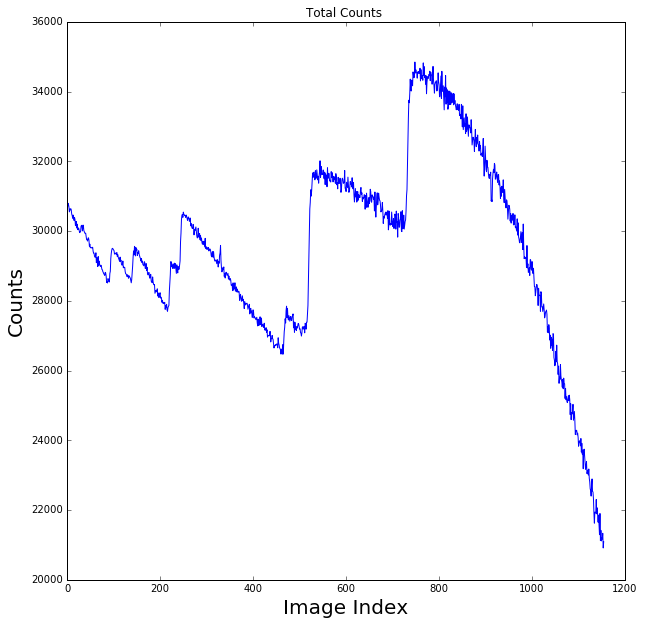

In [147]:
# display to check values
fig5 = plt.figure(figsize=(10, 10))
ax_img = plt.subplot(111)
ax_img.plot(range(nbr_images), total_counts)

ax_img.set_xlabel("Image Index", fontsize=20)
ax_img.set_ylabel("Counts", fontsize=20)
ax_img.set_title("Total Counts ")


### Select TOF file and define parameters required to calculate lambda equivalent spectra

In [164]:
import os
lambda_file = os.path.join(default_dir, 'lambda.txt')
print(lambda_file)

/Volumes/Macintosh HD 2/IPTS/BraggEdge/VULCAN/Inconel_Powder/lambda.txt


#### Load the lambda created in [lambda conversion](create_lambda_array.ipynb)

In [165]:
import sys

In [166]:
sys.path.append('/users/j35/git/braggedge/python')

In [167]:
import neutronbraggedge
from neutronbraggedge.experiment_handler import *

In [171]:
_lambda_handler = LambdaWavelength(filename = lambda_file )

In [173]:
lambda_array = _lambda_handler.lambda_array
lambda_range = lambda_array[file_index_start: file_index_end]
print(len(lambda_range))
print(len(cropped_normalized))

1155
1155


In [184]:
print(len(lambda_array))

1490


### Counts vs Lambda

     1. for entire images

In [174]:
lambda_np = np.array(lambda_range)
lambda_angstroms = lambda_np * 1.e10

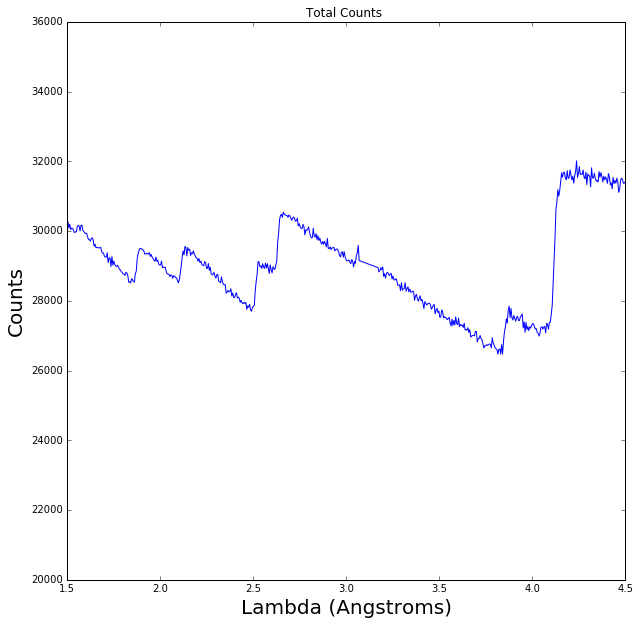

In [175]:
# display to check values
fig10 = plt.figure(figsize=(10, 10))
ax_img = plt.subplot(111)
ax_img.plot(lambda_angstroms, total_counts)

ax_img.set_xlabel("Lambda (Angstroms)", fontsize=20)
ax_img.set_ylabel("Counts", fontsize=20)
ax_img.set_xlim([1.5, 4.5])
#ax_img.set_ylim([1e5, 1.15e5])
ax_img.set_title("Total Counts ")

### Calculate  for the material, the set of 'hkl' and display them on each Counts vs lambda plots

In [179]:
from neutronbraggedge.braggedge import BraggEdge

In [180]:
_handler = BraggEdge(material='inconel', number_of_bragg_edges=10, use_local_metadata_table=True)

In [181]:
_handler.hkl

[[1, 1, 1],
 [2, 0, 0],
 [2, 2, 0],
 [2, 2, 2],
 [3, 1, 1],
 [3, 3, 1],
 [3, 3, 3],
 [4, 0, 0],
 [4, 2, 0],
 [4, 2, 2]]

In [182]:
_handler.bragg_edges

[4.1511484354734094,
 3.5950000000000002,
 2.5420488783656383,
 2.0755742177367047,
 2.1678665675141207,
 1.6494991265293391,
 1.3837161451578031,
 1.7975000000000001,
 1.6077328758223488,
 1.4676526042175877]

### display bragg edges calculated on top of Total_counts vs lambda

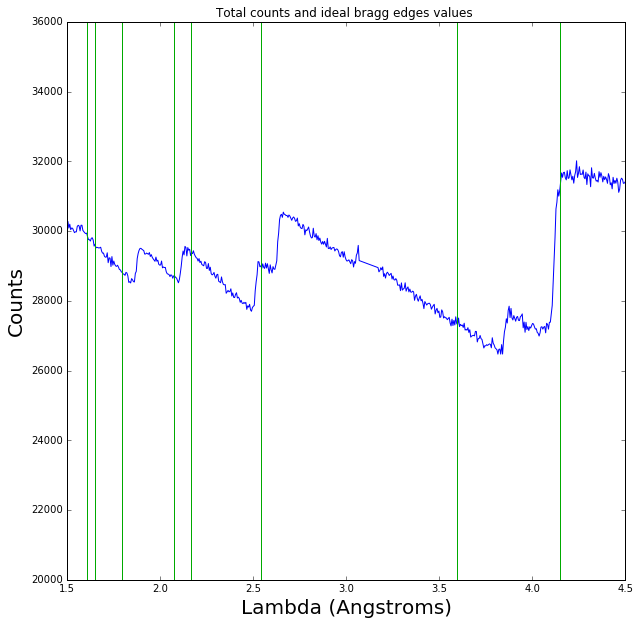

In [183]:
# display to check values
fig11 = plt.figure(figsize=(10, 10))
ax_img = plt.subplot(111)
ax_img.plot(lambda_angstroms, total_counts)

ax_img.set_xlabel("Lambda (Angstroms)", fontsize=20)
ax_img.set_ylabel("Counts", fontsize=20)
ax_img.set_xlim([1.5, 4.5])
#ax_img.set_ylim([1e5, 1.15e5])
ax_img.set_title("Total counts and ideal bragg edges values ")

for _value in _handler.bragg_edges:
    ax_img.axvline(_value, color="#00aa00", linewidth=1)


### Add labels of crystal orientation on top of plot 

In [62]:
_hkl_string = []
for _hkl in _handler.hkl:
    _hkl_s = ",".join(str(x) for x in _hkl)
    _hkl_string.append(_hkl_s)
print(_hkl_string)

['1,1,1', '2,0,0', '2,2,0', '2,2,2', '3,1,1', '3,3,1', '3,3,3', '4,0,0', '4,2,0', '4,2,2']


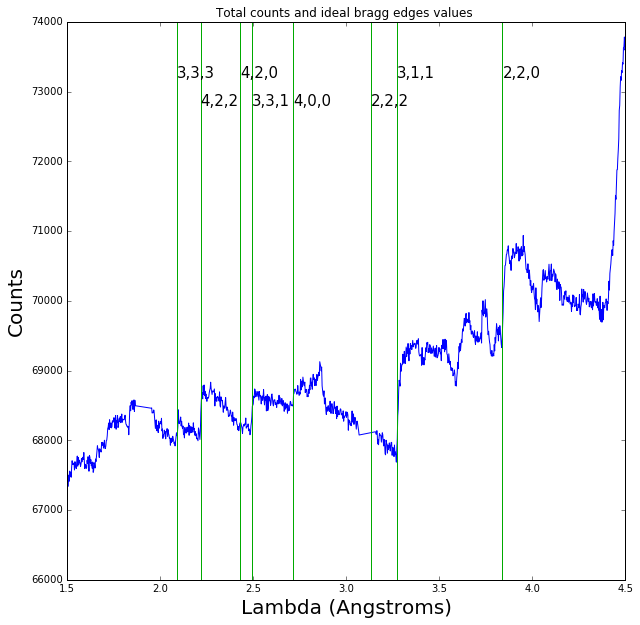

In [75]:
# display to check values
fig11 = plt.figure(figsize=(10, 10))
ax_img = plt.subplot(111)
ax_img.plot(lambda_angstroms, total_counts)

min_x = 1.5
max_x = 4.5

ax_img.set_xlabel("Lambda (Angstroms)", fontsize=20)
ax_img.set_ylabel("Counts", fontsize=20)
ax_img.set_xlim([min_x, max_x])
#ax_img.set_ylim([1e5, 1.15e5])
ax_img.set_title("Total counts and ideal bragg edges values ")

y_offset = 200
y_value = 73000
for _index, _value in enumerate(_handler.bragg_edges):
    if _value > max_x:
        continue
    ax_img.axvline(_value, color="#00aa00", linewidth=1)
    ax_img.text(_value, y_value + ((-1)**_index)*y_offset, _hkl_string[_index], fontsize=15)
    